# Support Vector Machine

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('breast_cancer_data.p')

In [3]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## SVM with two features
We'll choose two features (say, 'radius_worst' and 'concave points_worst') and play with linear SVC model.

In [4]:
y = df.diagnosis
X = df[['radius_worst','concave points_worst']] #we choose two features as an example

Let's plot the data.

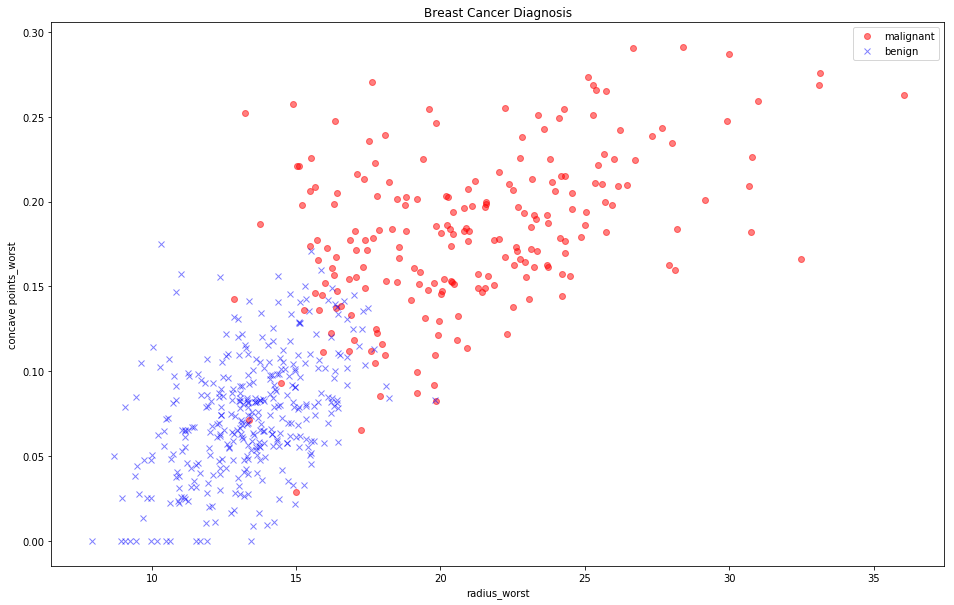

In [5]:
plt.figure(figsize=(16,10))
plt.plot(X[y==1]['radius_worst'],X[y==1]['concave points_worst'],'ro',alpha=0.5,label='malignant')
plt.plot(X[y==0]['radius_worst'],X[y==0]['concave points_worst'],'bx',alpha=0.5,label='benign')
plt.xlabel('radius_worst')
plt.ylabel('concave points_worst')
plt.title('Breast Cancer Diagnosis')
plt.legend()

## Linear SVC
There are two classes:    
1) `SVC(kernel='linear')`    
2) `LinearSVC()`    
The class LinearSVC is better (faster) than SVC when it comes to linear kernel, but SVC lets you choose different types of kernels.

In [6]:
from sklearn.svm import SVC

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
svc = SVC(C=1,kernel='linear').fit(X_train,y_train)

In [9]:
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

For the two features $x_1$ and $x_2$, let the decision boundary $t^{(i)} = a x_1^{(i)} + b x_2^{(i)} + c$, where $t^{(i)}=\pm 1$. $t^{(i)}=1$ for the positive class $y^{(i)}=+1$ and $t^{(i)}=-1$ for the negative class $y^{(i)}=0$. The $i$ is the sample index. From the svc classifier object after fitting into the training data, you can pull the coefficients ($a$ and $b$) and the intercept ($c$) as below.

In [10]:
svc.coef_ 

array([[0.63552224, 2.80914854]])

In [11]:
svc.intercept_

array([-10.95675969])

In [12]:
a = svc.coef_[0][0]
b = svc.coef_[0][1]
c = svc.intercept_[0]

The `.support_` attribute returns a list of indices of support vectors (the data points that are within the margin and in the wrong hyperplane). Support vectors are highlighted yellow in the below graph.

In [13]:
svc.support_

array([  6,  18,  20,  24,  44,  53,  59,  61,  63,  65,  66,  72,  73,
        82,  86, 107, 117, 124, 129, 133, 136, 144, 149, 160, 171, 180,
       203, 204, 207, 223, 229, 230, 239, 241, 247, 262, 272, 281, 282,
       284, 290, 299, 305, 334, 355, 358, 380, 395, 405, 415, 419, 436,
       437,   5,  17,  30,  34,  36,  50,  55,  71,  95, 100, 106, 120,
       130, 134, 141, 145, 147, 155, 162, 183, 193, 197, 202, 236, 283,
       285, 306, 309, 310, 312, 323, 324, 327, 329, 332, 335, 353, 354,
       357, 360, 362, 364, 365, 391, 394, 398, 403, 409, 413, 435, 441,
       446, 453], dtype=int32)

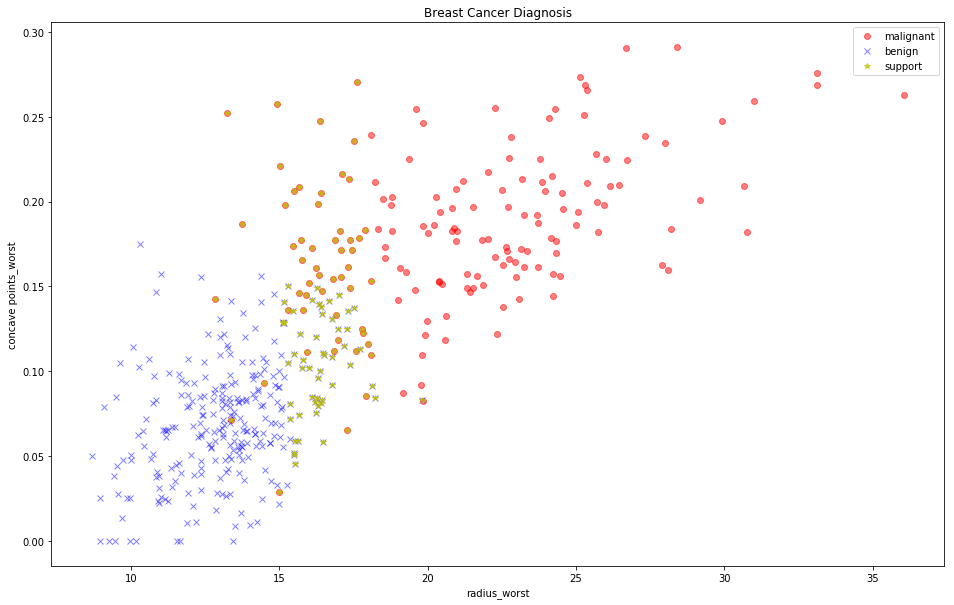

In [14]:
support = X_train.iloc[list(svc.support_)]
plt.figure(figsize=(16,10))
plt.plot(X_train[y_train==1]['radius_worst'],X_train[y_train==1]['concave points_worst'],'ro',alpha=0.5,label='malignant')
plt.plot(X_train[y_train==0]['radius_worst'],X_train[y_train==0]['concave points_worst'],'bx',alpha=0.5,label='benign')
plt.plot(support['radius_worst'],support['concave points_worst'],'y*',alpha=0.7,label='support')
plt.xlabel('radius_worst')
plt.ylabel('concave points_worst')
plt.title('Breast Cancer Diagnosis')
plt.legend()

The attribute `support_vectors_` returns actual coordinates of the support vectors. Note that we didn't scale the X. The number of support vectors is total 106 (53 miss-classfied y=0 class and 53 miss-classfied y=1 class)

In [15]:
svc.support_vectors_ #support vectors are the data points within the margin and on the wrong hyperplane

array([[15.77   ,  0.1021 ],
       [16.22   ,  0.0753 ],
       [17.38   ,  0.1035 ],
       [16.34   ,  0.1397 ],
       [16.31   ,  0.07971],
       [16.51   ,  0.1095 ],
       [16.46   ,  0.1108 ],
       [15.35   ,  0.07174],
       [16.41   ,  0.1379 ],
       [15.8    ,  0.1069 ],
       [15.11   ,  0.1284 ],
       [16.22   ,  0.1205 ],
       [15.11   ,  0.1288 ],
       [15.15   ,  0.1282 ],
       [16.46   ,  0.05813],
       [16.01   ,  0.1017 ],
       [16.76   ,  0.09186],
       [16.36   ,  0.1001 ],
       [15.5    ,  0.05185],
       [15.34   ,  0.08056],
       [16.67   ,  0.1414 ],
       [16.77   ,  0.1087 ],
       [18.22   ,  0.08436],
       [16.25   ,  0.1489 ],
       [15.14   ,  0.1407 ],
       [18.13   ,  0.09123],
       [16.41   ,  0.0815 ],
       [16.25   ,  0.08405],
       [15.7    ,  0.1221 ],
       [16.97   ,  0.1251 ],
       [15.49   ,  0.05104],
       [16.2    ,  0.08178],
       [15.44   ,  0.1357 ],
       [15.63   ,  0.0589 ],
       [15.3  

In [16]:
svc.n_support_

array([53, 53], dtype=int32)

Let's scale the `X_train` since SVM works better when the data is scaled.

In [17]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
svc2 = SVC(C=1,kernel='linear').fit(X_scaled,y_train)

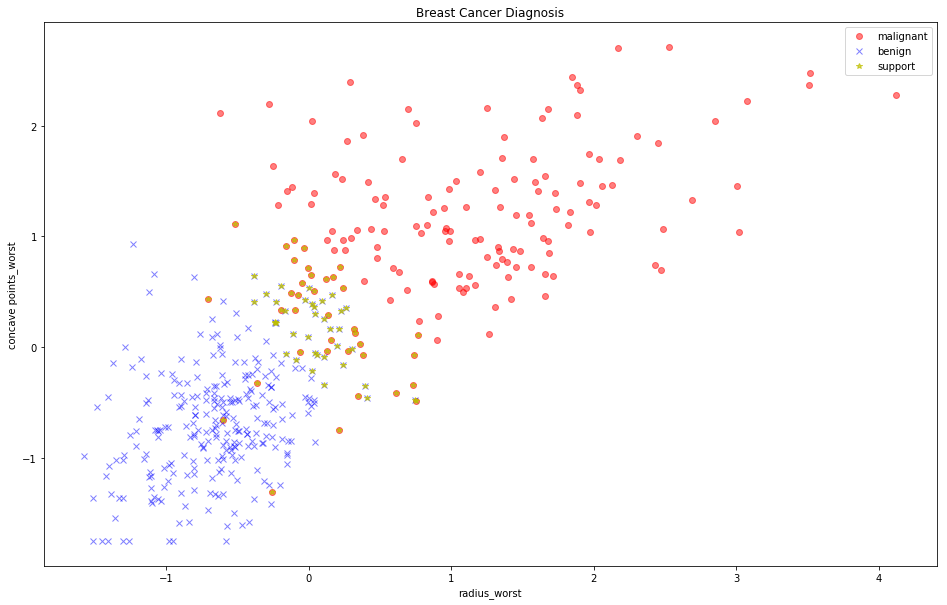

In [18]:
support = svc2.support_vectors_
plt.figure(figsize=(16,10))
plt.plot(X_scaled[y_train==1][:,0],X_scaled[y_train==1][:,1],'ro',alpha=0.5,label='malignant')
plt.plot(X_scaled[y_train==0][:,0],X_scaled[y_train==0][:,1],'bx',alpha=0.5,label='benign')
plt.plot(support[:,0],support[:,1],'y*',alpha=0.7,label='support')
plt.xlabel('radius_worst')
plt.ylabel('concave points_worst')
plt.title('Breast Cancer Diagnosis')
plt.legend()

Indeed the the total number of support vectors (miss-classfied) is reduced to 73 when X is scaled.

In [19]:
svc2.n_support_ #SVC's support vector number is smaller when we use scaled data. (more desirable)
# n_support: Number of support vectors for each class.

array([36, 37], dtype=int32)

Let's see what `.dual_coef_` is. It seems some numbers between -1 and 1 (in fact -C and C). And it's something to do with the support vectors.

In [20]:
svc2.dual_coef_[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -0.97286768, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.42435558,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.5485121 ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [21]:
svc2.dual_coef_[0].sum()

0.0

In [22]:
len(svc2.dual_coef_[0])

73

Let's display these points.

In [23]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

In [24]:
def display(clf,X,y,c=1):
    support = clf.support_vectors_
    eps = clf.dual_coef_[0]
    plt.figure(figsize=(16,10))
    plt.plot(X[y==1][:,0],X[y==1][:,1],'ro',alpha=0.4,label='malignant')
    plt.plot(X[y==0][:,0],X[y==0][:,1],'bo',alpha=0.4,label='benign')
    #plt.plot(support[:,0],support[:,1],'y*',alpha=0.7,label='support')
    plt.scatter(support[eps==-c,0],support[eps==-c,1],facecolors='none',s=100,edgecolor='b', label='eps=-'+str(c))
    plt.scatter(support[eps==c,0],support[eps==c,1],facecolors='none',s=100,edgecolor='r',label='eps='+str(c))
    plt.scatter(support[(eps<c)&(eps>-c),0],support[(eps<c)&(eps>-c),1],marker='s',facecolors='none',s=100,edgecolor='k',label='-'+str(c)+'<eps<'+str(c))
    for i in range(len(eps[(eps<c)&(eps>-c)])):
        plt.annotate(int(eps[(eps<c)&(eps>-c)][i]*100)/100,xy=(support[(eps<c)&(eps>-c),0][i]+0.05,support[(eps<c)&(eps>-c),1][i]+0.05))
    #plot_hyperplane(svc2,-2,4,'k--','decision boundary')
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    # plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['b', 'k', 'r'],
                 linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlim(-1,2) #changed display min max to zoom in
    plt.ylim(-2,3)
    plt.xlabel('radius_worst')
    plt.ylabel('concave points_worst')
    plt.title('Breast Cancer Diagnosis')
    plt.legend()

Below plot shows what those support vector points with the "decision function coefficients"(`.dual_coef_`) values. For the negative class ($y=0, t=-1$), the points with negative `.dual_coef_` values are above the lower bound of the decision boundary (blue dotted line). For the positive class ($y=1, t=+1$), the points with positive `.dual_coef_` values are below the upper bound of the decision boundary (red dotted line). Points whose absolute value is between 0 and 1 seem to be on the those bound lines (black squares).

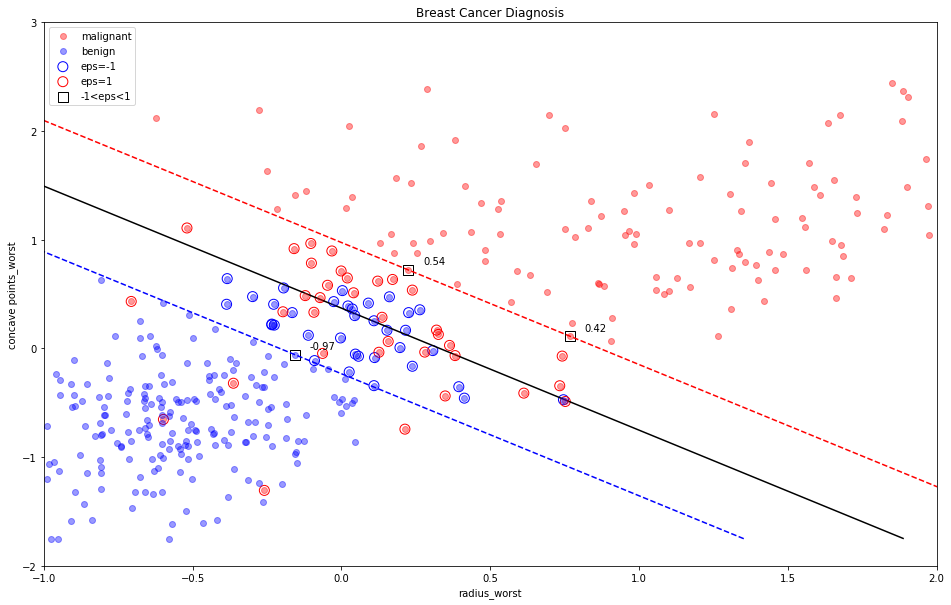

In [25]:
display(svc2,X_scaled,y_train,1)

### Q1. Do the same for C=10
#### Q1-1) How does the number of support vectors change?
#### Q1-2) Does larger C parameter widen or narrower the margin?

In [26]:
svc3 = SVC(C=10,kernel='linear').fit(X_scaled,y_train)

In [27]:
svc3.n_support_ 

array([33, 33], dtype=int32)

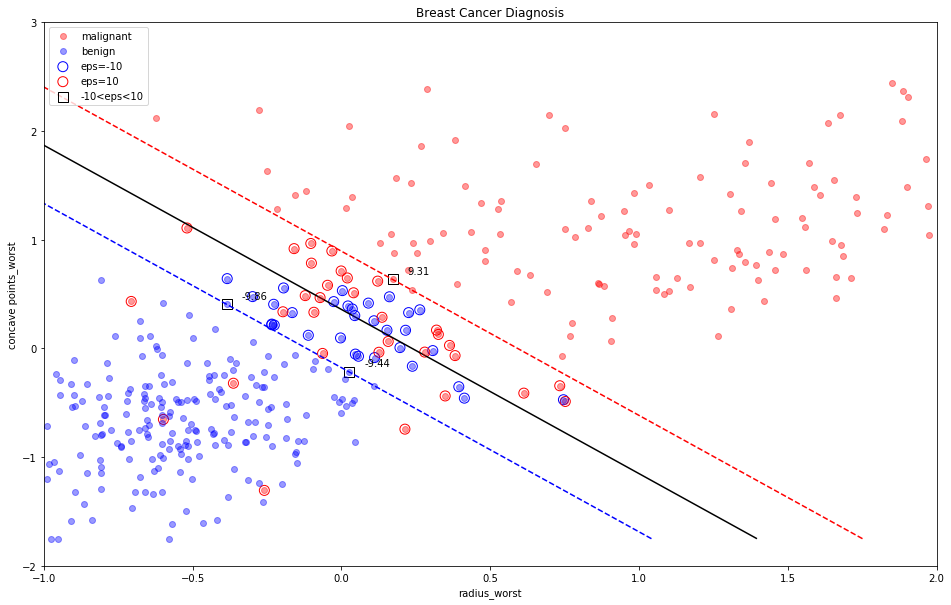

In [28]:
display(svc3,X_scaled,y_train,10)

In [29]:
def run(c):
    clf = SVC(C=c,kernel='linear').fit(X_scaled,y_train)
    print(clf.n_support_)
    display(clf,X_scaled,y_train,c)

[34 33]


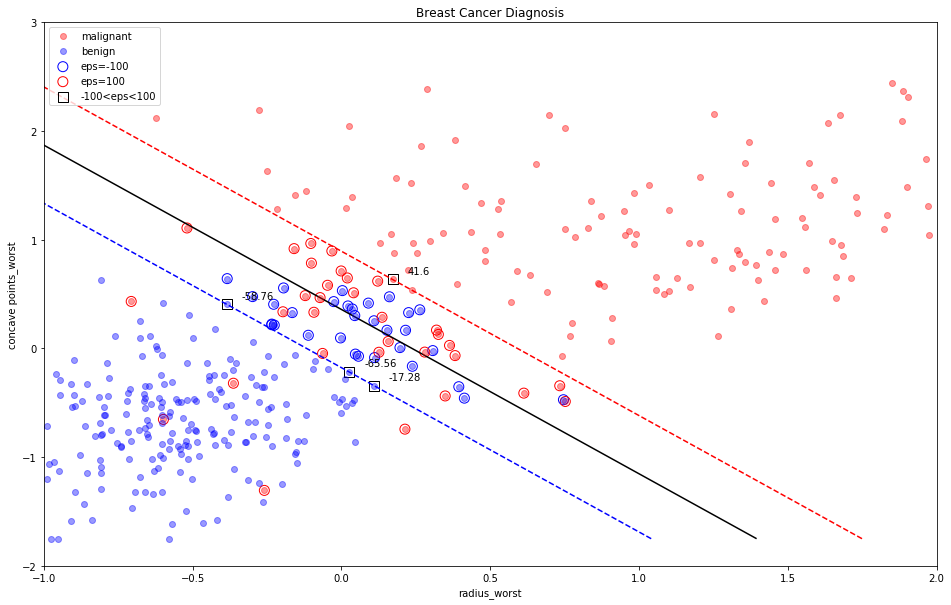

In [30]:
run(100)

### Q2. Display the test data overlayed with the decision boundaries (with both margins) for different C values.
In the graph, you should have red dots (points with y_test=1) and blue dots (points with y_test=0), a red dashed line (upper margin), a blue dashed line (lower margin), and a black solid line for the decision boundary.    
Try values for C=$10^{-2}$~$10^3$ (e.g. 0.01, 0.1, 1, 10, 100, 1000).    
### Also print out the number of support vectors and the test score.     
Hint: The test score can be pulled from `.score(x_test,y_test)` (You should also scaled X_test).

In [31]:
X_test_scaled = preprocessing.scale(X_test)
def display_test(clf):
    plt.figure(figsize=(16,10))
    plt.plot(X_test_scaled[y_test==1][:,0],X_test_scaled[y_test==1][:,1],'ro',alpha=0.4,label='malignant')
    plt.plot(X_test_scaled[y_test==0][:,0],X_test_scaled[y_test==0][:,1],'bo',alpha=0.4,label='benign')
    plt.axis('tight')
    x_min = X_test_scaled[:, 0].min()
    x_max = X_test_scaled[:, 0].max()
    y_min = X_test_scaled[:, 1].min()
    y_max = X_test_scaled[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    # plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['b', 'k', 'r'],
                 linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlim(-1,2) #changed display min max to zoom in
    plt.ylim(-2,3)
    plt.xlabel('radius_worst')
    plt.ylabel('concave points_worst')
    plt.title('Breast Cancer Diagnosis')
    plt.legend()

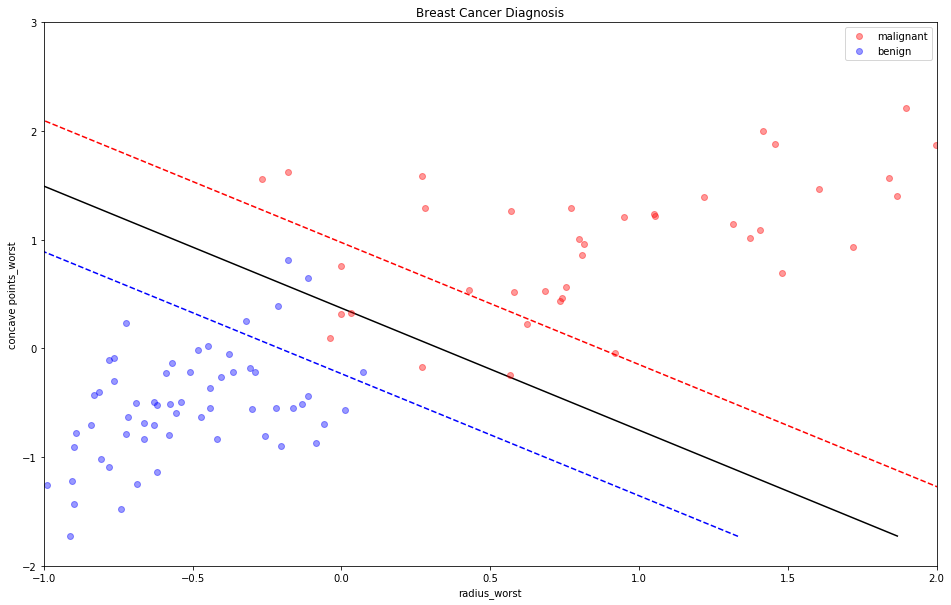

In [32]:
display_test(svc2)

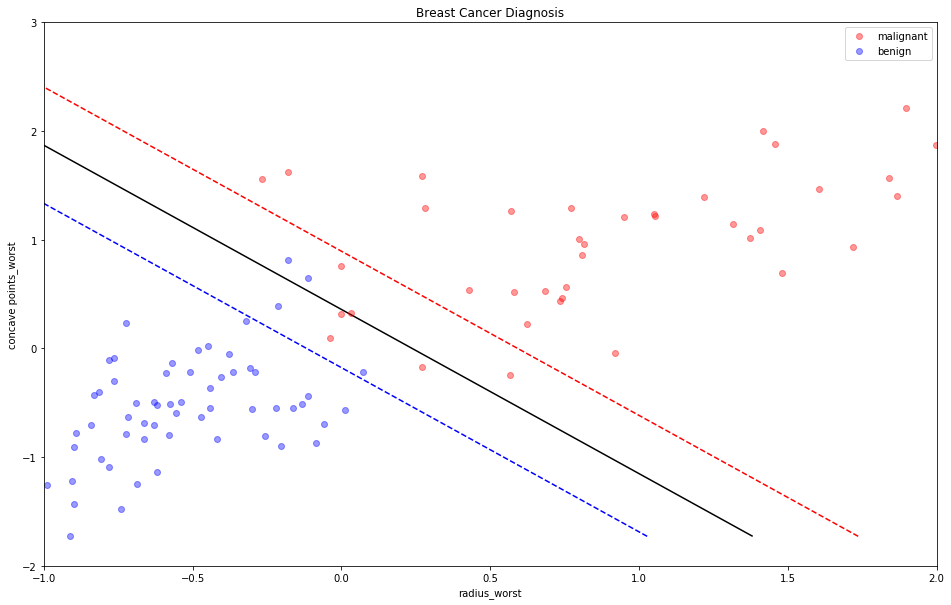

In [33]:
display_test(svc3)

0.01
[96 97]
test score 0.9473684210526315
------------------------------
0.1
[51 51]
test score 0.9385964912280702
------------------------------
1
[36 37]
test score 0.9473684210526315
------------------------------
10
[33 33]
test score 0.956140350877193
------------------------------
100
[34 33]
test score 0.956140350877193
------------------------------
1000
[34 33]
test score 0.956140350877193
------------------------------


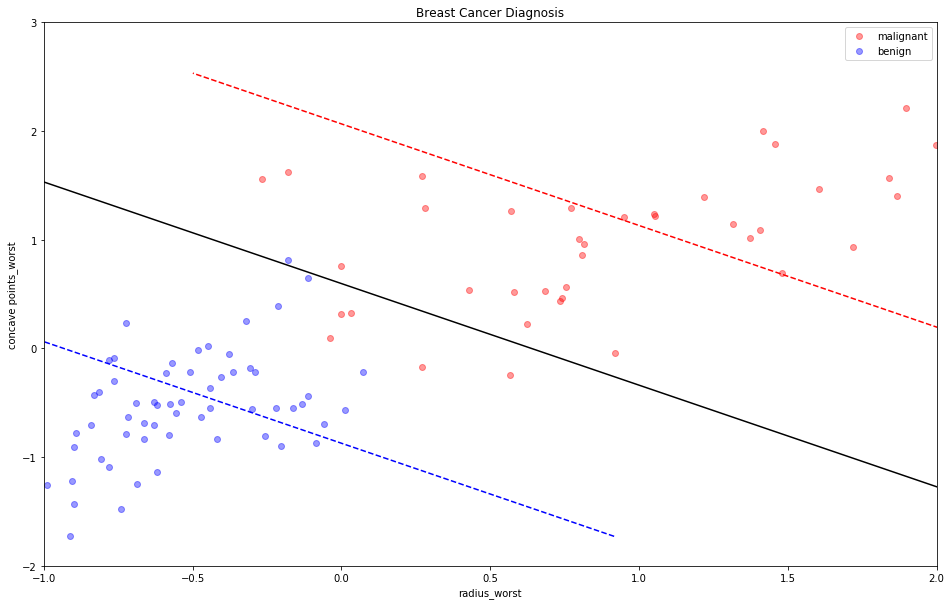

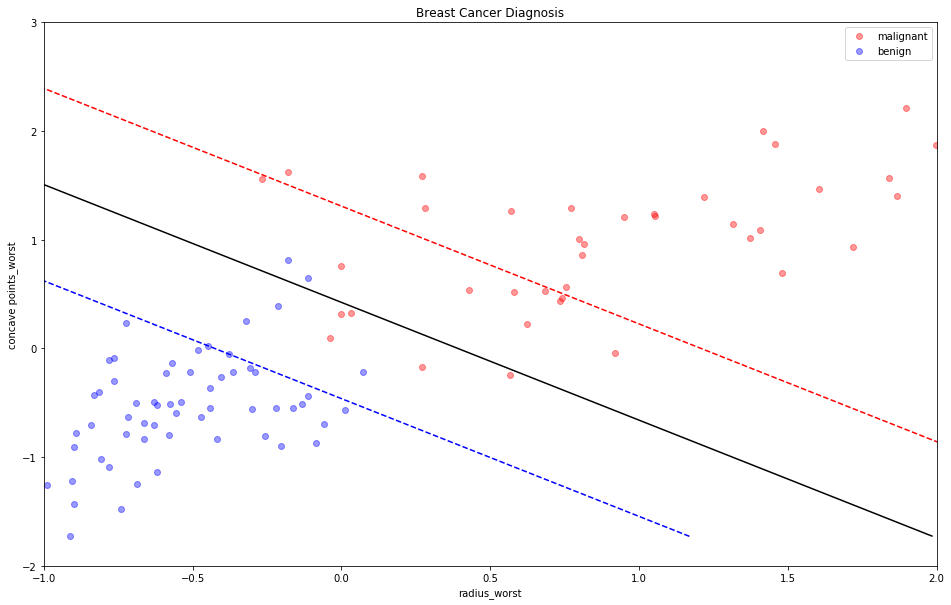

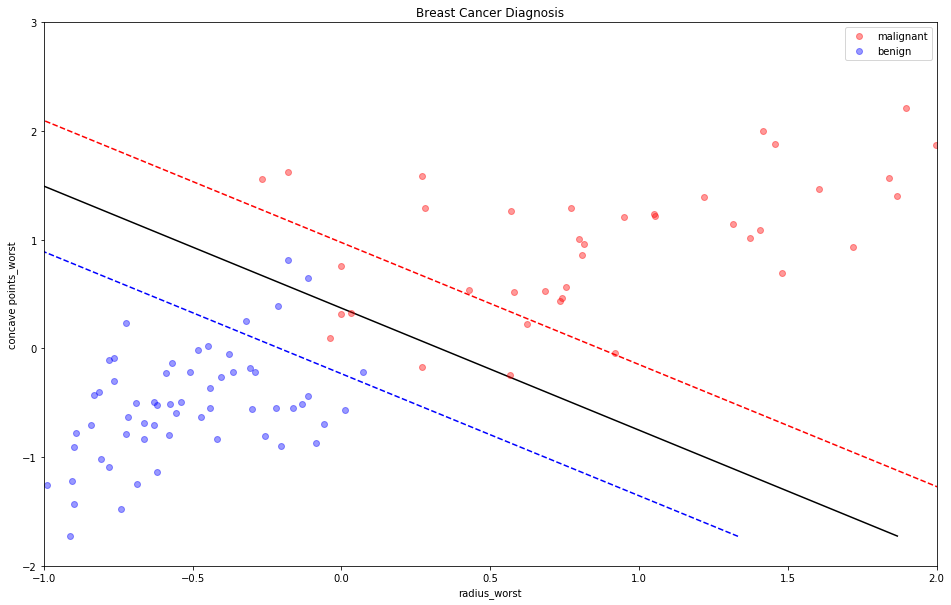

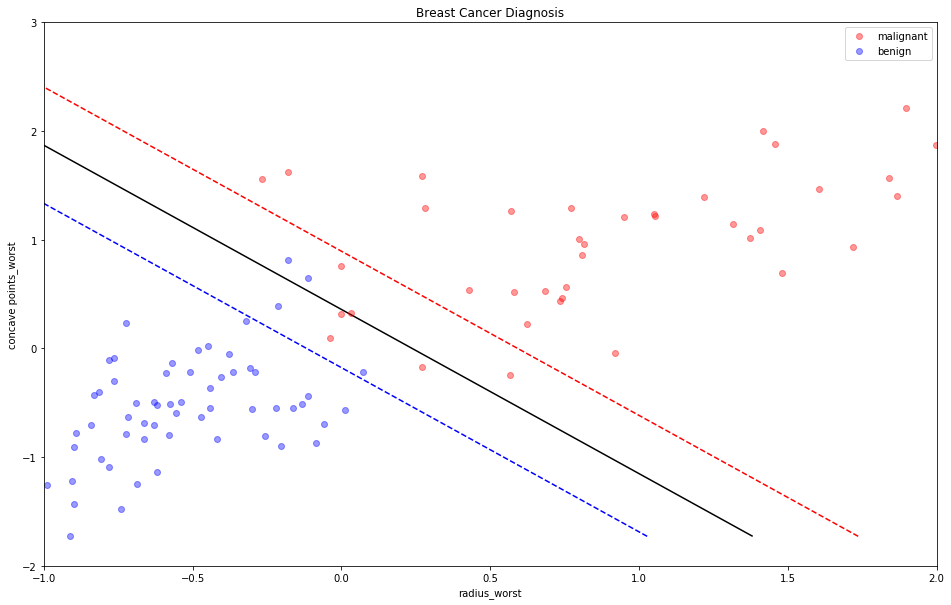

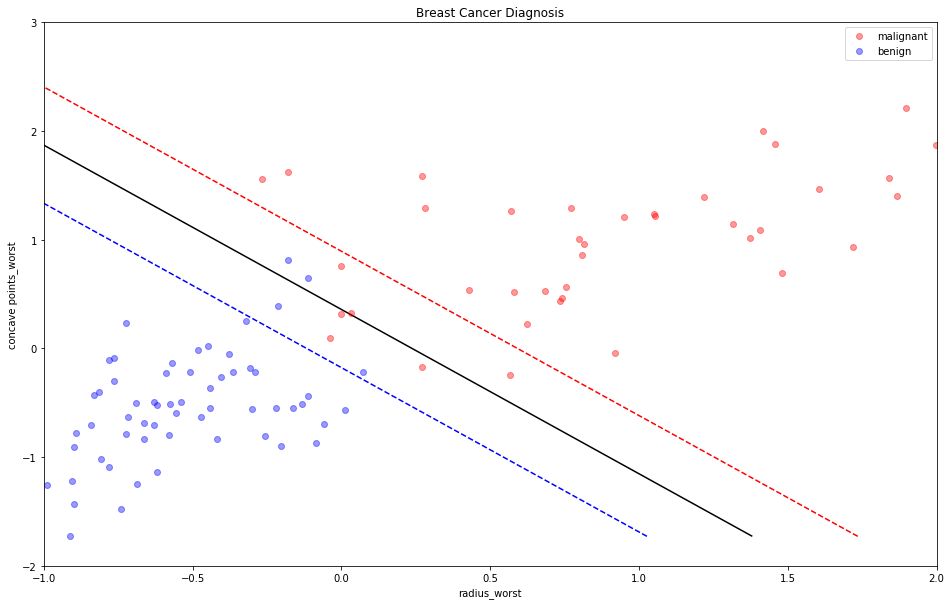

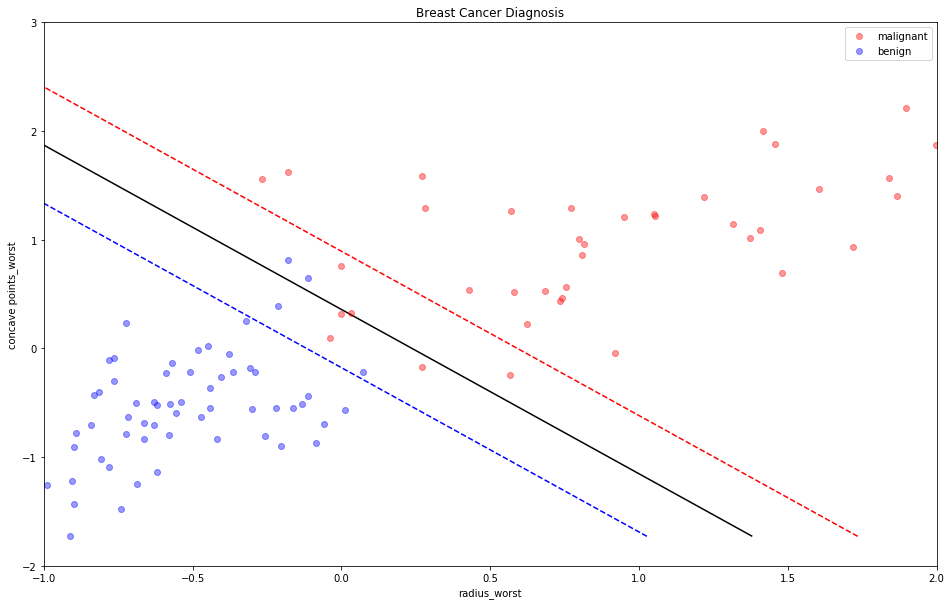

In [34]:
for c in [0.01, 0.1,1,10,100,1000]:
    clf = SVC(C=c,kernel='linear').fit(X_scaled,y_train)
    print(c)
    print(clf.n_support_)
    print('test score',clf.score(X_test_scaled,y_test))
    display_test(clf)
    print('------------------------------')

### Q3. Now, plot log(c) vs. each metric (ACC, recall, precision, F1, AUC) for train and test data.
You should have 5 plots, each of which has log(C) on the x-axis and the metric on the y-axis. In each plot, you should display the score (metric) from X_train(scaled) and X_test(scaled) with difference colors or symbols.
#### Q3.1) What can you conclude from the trends of train and test scores? Are they overfitting or underfitting? What C value is the best?

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
cs=np.array([0.01, 0.1,1,10,100,1000,100000, 10**9])
acc=[]
rec=[]
prc=[]
f1=[]
au=[]
for c in cs:
    clf = SVC(C=c,kernel='linear').fit(X_scaled,y_train)
    yp_train = clf.predict(X_scaled)
    yp_test = clf.predict(X_test_scaled)
    fpr_tr, tpr_tr, _ = roc_curve(y_train,yp_train)
    fpr_te, tpr_te, _ = roc_curve(y_test,yp_test)
    acc.append([accuracy_score(y_train, yp_train),accuracy_score(y_test, yp_test)])
    rec.append([recall_score(y_train, yp_train),recall_score(y_test, yp_test)])
    prc.append([precision_score(y_train, yp_train),precision_score(y_test, yp_test)])
    f1.append([f1_score(y_train, yp_train),f1_score(y_test, yp_test)])
    au.append([auc(fpr_tr,tpr_tr), auc(fpr_te,tpr_te)])
acc=np.array(acc)    
rec=np.array(rec)
prc=np.array(prc)
f1=np.array(f1)
au=np.array(au)

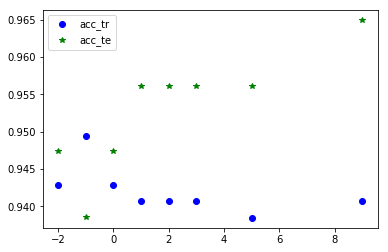

In [42]:
plt.plot(np.log10(cs),acc[:,0],'bo',label='acc_tr')
plt.plot(np.log10(cs),acc[:,1],'g*',label='acc_te')
plt.legend()

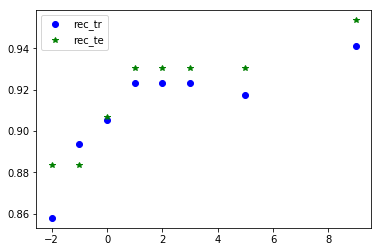

In [43]:
plt.plot(np.log10(cs),rec[:,0],'bo',label='rec_tr')
plt.plot(np.log10(cs),rec[:,1],'g*',label='rec_te')
plt.legend()

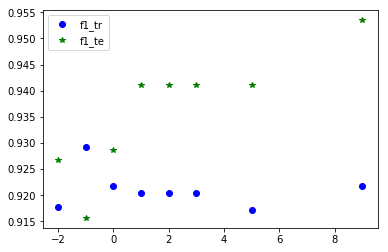

In [44]:
plt.plot(np.log10(cs),f1[:,0],'bo',label='f1_tr')
plt.plot(np.log10(cs),f1[:,1],'g*',label='f1_te')
plt.legend()

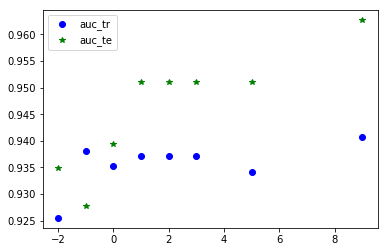

In [45]:
plt.plot(np.log10(cs),au[:,0],'bo',label='auc_tr')
plt.plot(np.log10(cs),au[:,1],'g*',label='auc_te')
plt.legend()

ANS: Test scores are better than train scores! That means it's still underfitting.

### Q4. Include all features
#### Q4.1) Construct scaled X_train and X_test for all features.
#### Q4.2) Repeat Q3 for the new Xs.
#### Q4.3) Discuss the result. Is it underfitting or overfitting? What is the best C?

In [46]:
y = df.diagnosis
X = df.drop('diagnosis',axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [48]:
cs=np.array([0.01, 0.1,1,10,100,1000])
acc=[]
rec=[]
prc=[]
f1=[]
au=[]
for c in cs:
    clf = SVC(C=c,kernel='linear').fit(X_scaled,y_train)
    yp_train = clf.predict(X_scaled)
    yp_test = clf.predict(X_test_scaled)
    fpr_tr, tpr_tr, _ = roc_curve(y_train,yp_train)
    fpr_te, tpr_te, _ = roc_curve(y_test,yp_test)
    acc.append([accuracy_score(y_train, yp_train),accuracy_score(y_test, yp_test)])
    rec.append([recall_score(y_train, yp_train),recall_score(y_test, yp_test)])
    prc.append([precision_score(y_train, yp_train),precision_score(y_test, yp_test)])
    f1.append([f1_score(y_train, yp_train),f1_score(y_test, yp_test)])
    au.append([auc(fpr_tr,tpr_tr), auc(fpr_te,tpr_te)])
acc=np.array(acc)    
rec=np.array(rec)
prc=np.array(prc)
f1=np.array(f1)
au=np.array(au)

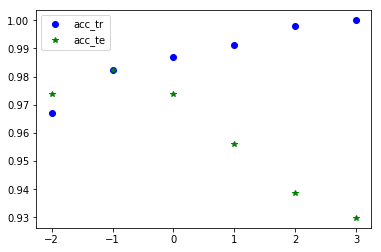

In [49]:
plt.plot(np.log10(cs),acc[:,0],'bo',label='acc_tr')
plt.plot(np.log10(cs),acc[:,1],'g*',label='acc_te')
plt.legend()

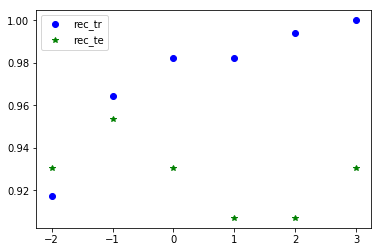

In [50]:
plt.plot(np.log10(cs),rec[:,0],'bo',label='rec_tr')
plt.plot(np.log10(cs),rec[:,1],'g*',label='rec_te')
plt.legend()

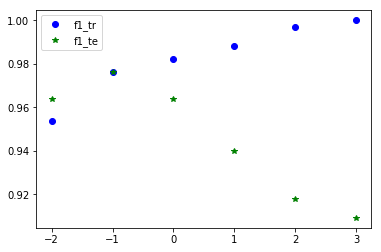

In [51]:
plt.plot(np.log10(cs),f1[:,0],'bo',label='f1_tr')
plt.plot(np.log10(cs),f1[:,1],'g*',label='f1_te')
plt.legend()

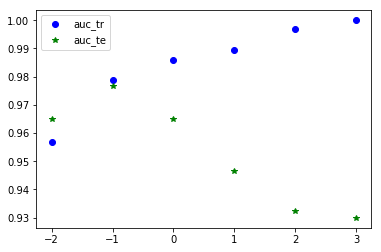

In [52]:
plt.plot(np.log10(cs),au[:,0],'bo',label='auc_tr')
plt.plot(np.log10(cs),au[:,1],'g*',label='auc_te')
plt.legend()

### Q5. Repeat Q3 (with only two features) and Q4 (with all the features) using LinearSVC.
Do you observice any difference in the performance?
You can read about difference in [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

/home/geena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


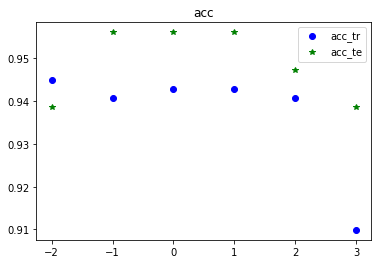

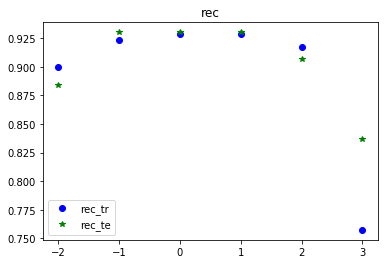

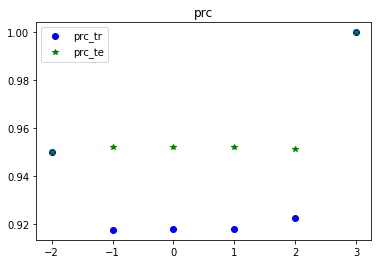

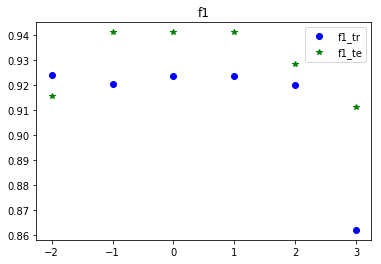

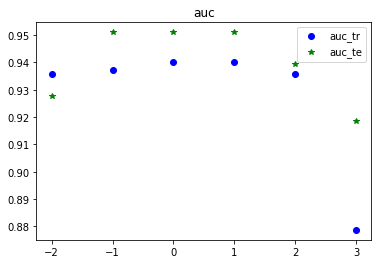

In [54]:
from sklearn.svm import LinearSVC
y = df.diagnosis
X = df[['radius_worst','concave points_worst']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
cs=np.array([0.01, 0.1,1,10,100,1000])
acc=[]
rec=[]
prc=[]
f1=[]
au=[]
for c in cs:
    clf = LinearSVC(C=c).fit(X_scaled,y_train)
    yp_train = clf.predict(X_scaled)
    yp_test = clf.predict(X_test_scaled)
    fpr_tr, tpr_tr, _ = roc_curve(y_train,yp_train)
    fpr_te, tpr_te, _ = roc_curve(y_test,yp_test)
    acc.append([accuracy_score(y_train, yp_train),accuracy_score(y_test, yp_test)])
    rec.append([recall_score(y_train, yp_train),recall_score(y_test, yp_test)])
    prc.append([precision_score(y_train, yp_train),precision_score(y_test, yp_test)])
    f1.append([f1_score(y_train, yp_train),f1_score(y_test, yp_test)])
    au.append([auc(fpr_tr,tpr_tr), auc(fpr_te,tpr_te)])
acc=np.array(acc)    
rec=np.array(rec)
prc=np.array(prc)
f1=np.array(f1)
au=np.array(au)

keys = ['acc','rec','prc','f1','auc']
vals=[acc,rec,prc,f1,au]
metricd=dict(zip(keys,vals))
for k in keys:
    plt.plot(np.log10(cs),metricd[k][:,0],'bo',label=k+'_tr')
    plt.plot(np.log10(cs),metricd[k][:,1],'g*',label=k+'_te')
    plt.legend()
    plt.title(k)
    plt.show()

/home/geena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


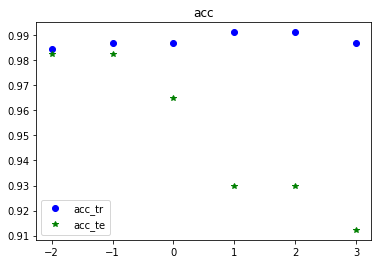

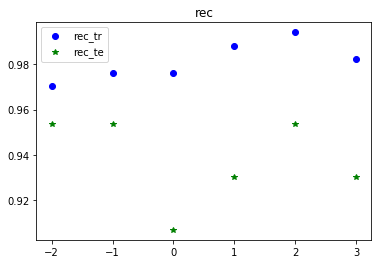

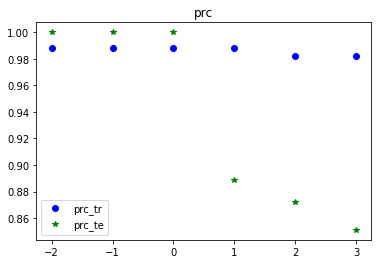

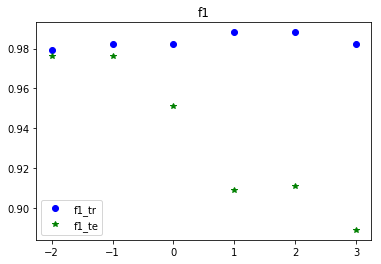

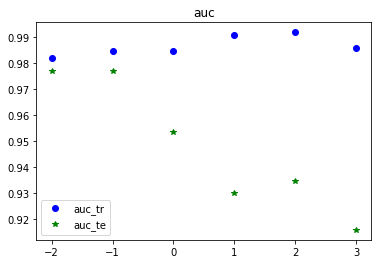

In [55]:
from sklearn.svm import LinearSVC
y = df.diagnosis
X = df.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
cs=np.array([0.01, 0.1,1,10,100,1000])
acc=[]
rec=[]
prc=[]
f1=[]
au=[]
for c in cs:
    clf = LinearSVC(C=c).fit(X_scaled,y_train)
    yp_train = clf.predict(X_scaled)
    yp_test = clf.predict(X_test_scaled)
    fpr_tr, tpr_tr, _ = roc_curve(y_train,yp_train)
    fpr_te, tpr_te, _ = roc_curve(y_test,yp_test)
    acc.append([accuracy_score(y_train, yp_train),accuracy_score(y_test, yp_test)])
    rec.append([recall_score(y_train, yp_train),recall_score(y_test, yp_test)])
    prc.append([precision_score(y_train, yp_train),precision_score(y_test, yp_test)])
    f1.append([f1_score(y_train, yp_train),f1_score(y_test, yp_test)])
    au.append([auc(fpr_tr,tpr_tr), auc(fpr_te,tpr_te)])
acc=np.array(acc)    
rec=np.array(rec)
prc=np.array(prc)
f1=np.array(f1)
au=np.array(au)

keys = ['acc','rec','prc','f1','auc']
vals=[acc,rec,prc,f1,au]
metricd=dict(zip(keys,vals))
for k in keys:
    plt.plot(np.log10(cs),metricd[k][:,0],'bo',label=k+'_tr')
    plt.plot(np.log10(cs),metricd[k][:,1],'g*',label=k+'_te')
    plt.legend()
    plt.title(k)
    plt.show()

ANS: In terms of the best scores, they don't seem to be different. But It seems the LinearSVC has smaller value for the best C.

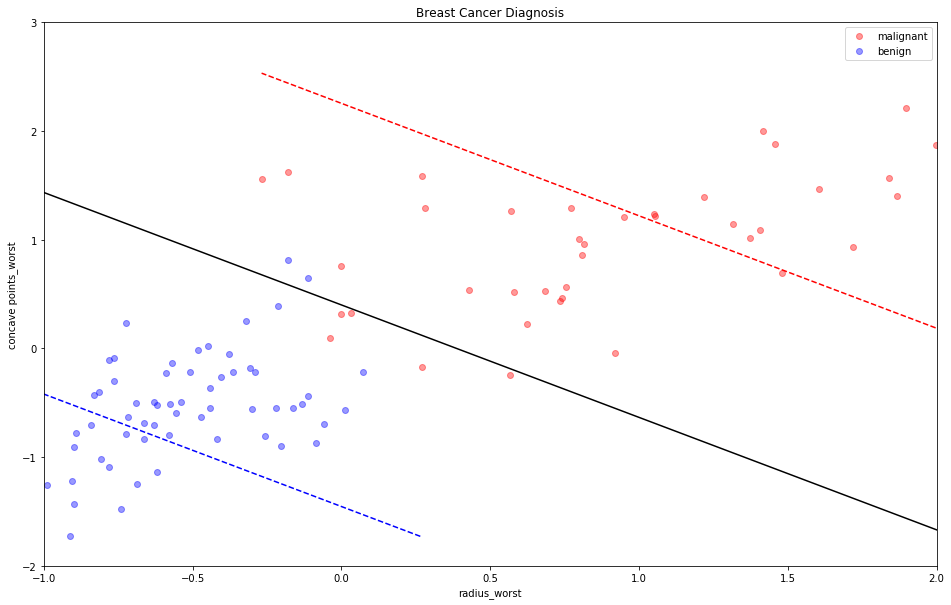

In [62]:
y = df.diagnosis
X = df[['radius_worst','concave points_worst']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
clf0 = LinearSVC(C=0.01).fit(X_scaled,y_train)
display_test(clf0)

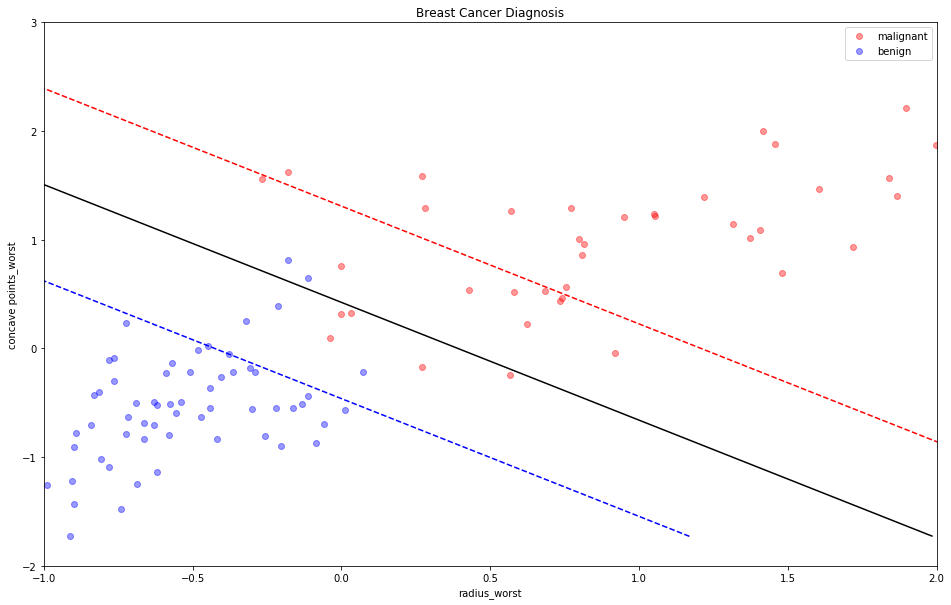

In [63]:
y = df.diagnosis
X = df[['radius_worst','concave points_worst']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
clf1 = SVC(C=0.1,kernel='linear').fit(X_scaled,y_train)
display_test(clf1)

In [64]:
yp0=clf0.predict(X_test_scaled)
yp1=clf1.predict(X_test_scaled)

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yp0)

array([[69,  2],
       [ 5, 38]])

In [66]:
confusion_matrix(y_test, yp1)

array([[69,  2],
       [ 5, 38]])

In [67]:
clf0.coef_

array([[0.55782063, 0.53930046]])

In [68]:
clf1.coef_

array([[1.22374394, 1.12961628]])

ANS: Their coefficients differ, but the confusion matrix are the same- the performance is the same.